## Agrupamento

aplicações:

segmentação de mercado<br>
grupo de clientes e compra de produtos <br>
agrupamento de documentos/noticias <br>
agrupamento de produtos similares <br>
perfis de cliente <br>
analise de redes sociais <br>

Aprendizagem não supervisionada <br>

Classificação/regressão: <br>

Relaciona característica com uma variável <br>

Agrupamento: <br>

Cria novos dados, o algoritmo aprende as relações entre os dados, mesmo sem um rótulo. <br>

identifica onde um grupo começa/termina <br>

elementos que pertencem a um grupo devem ser similares e diferentes do que estão fora do grupo (media mais proxima) <br>



## K-Means

Algoritmo de Lloyd <br>

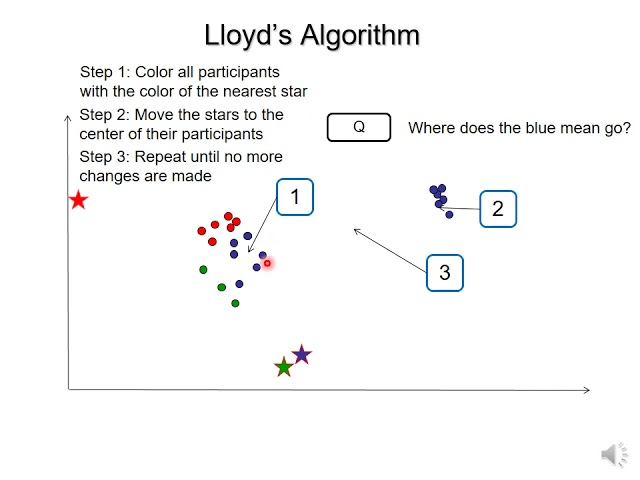

<br>1 Inicializar os centroide (centro de cada cor) aletoriamente, após definir um  K, calcular a distância e pintar os pontos com o centróide (estrela) <br>
<br>2 reposicionar o centróide no ponto do médio do grupo<br>
<br>3 repetir o processo 1 para cada centroide reposicionado, para ver se vai pertencer a um novo grupo <br>

<br> Calculo de distância: <br>

Distância euclidiana <br>

In [ ]:
## 